In [127]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from sklearn import tree, ensemble, neighbors, model_selection, metrics
from sklearn import tree
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [101]:
songdb = pd.read_csv("topsongs.csv")
albumdb = pd.read_csv("topalbums.csv")
artistdb = pd.read_csv("topartists.csv")

nominations_songdb_2020 = pd.read_csv("2020songs.csv")
nominations_albumdb_2020 = pd.read_csv("2020albums.csv")
nominations_artistdb_2020 = pd.read_csv("2020artists.csv")

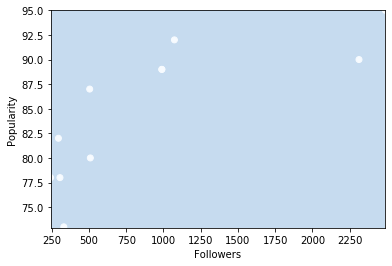

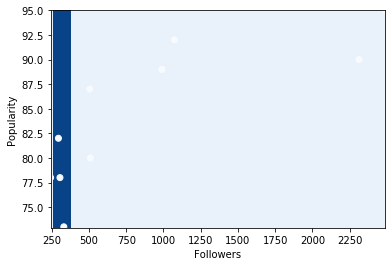

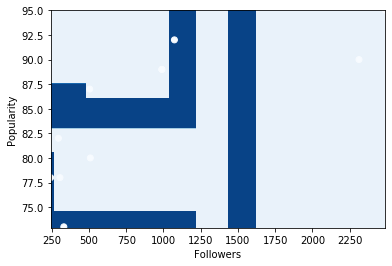

In [103]:
# Top artist predictions
artist_data = artistdb.copy().iloc[:,1:-1]
artist_data['Followers'] = artist_data['Followers']/10000
artist_target = artistdb.copy().iloc[:,-1:]
# artist_data

# Splits the data and target datasets into training and testing. Uses random seed to pick and choose data
X_train, X_test, y_train, y_test = train_test_split(artist_data, artist_target, test_size=0.2, random_state=109)

# Fits decision tree and linear SVC model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
# tree.plot_tree(dt_clf.fit(song_data, song_target.values.ravel())) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(X_train, y_train.values.ravel())

h = .5 # Step size for mesh graph

# Graphs
x_min, x_max = X_test['Followers'].min()-.1, X_test['Followers'].max()+.1
y_min, y_max = X_test['Popularity'].min()-.1, X_test['Popularity'].max()+.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h/5))
# print (xx.ravel())
# print(yy)
titles = ['SVC with linear kernel', '5-nearest-neighbors'
          'Decision Tree']
pl.set_cmap(pl.cm.Paired)

# Plots out results
for i, clf in enumerate((linear_svc, knn, dt_clf)):
    # Plot the decision boundary
    predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    predict = predict.reshape(xx.shape)
    pl.set_cmap(pl.cm.Paired)
    pl.contourf(xx, yy, predict, cmap=plt.cm.Blues)
    pl.axis('tight')

    pl.scatter(X_test['Followers'], X_test['Popularity'], c=y_test.values.ravel(), cmap=plt.cm.Blues)
    pl.xlabel('Followers')
    pl.ylabel('Popularity')
    pl.show()


    Popularity  Danceability  Energy  Loudness  Speechiness  Acousticness  \
51          85         0.753   0.657    -3.061       0.0449        0.1710   
16          67         0.515   0.300    -8.005       0.0289        0.5750   
1           69         0.587   0.622    -5.535       0.0303        0.0927   
22          77         0.642   0.289    -9.918       0.0367        0.6690   
52          89         0.572   0.385    -6.362       0.0308        0.3710   
44          75         0.686   0.415    -6.855       0.0752        0.3900   

    Liveness  Valence    Tempo  
51    0.1120    0.437  107.010  
16    0.1150    0.206   81.120  
1     0.2000    0.231  107.943  
22    0.1800    0.407   84.996  
52    0.2310    0.323   95.799  
44    0.0617    0.446  114.205  
[1 1 0 0 1 1]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 1 0]
Running the model against current year nominees
                          Name Date Released  Popularity  Danceability  \
0  Always Remember Us This Way    2018-10-05       

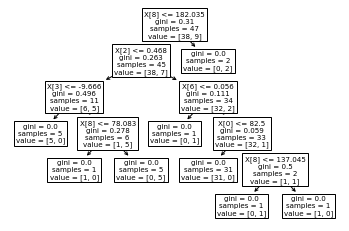

In [102]:
# Top songs predictions

# Splits the dataset into the parameters and the target
song_data = songdb.copy().iloc[:,2:-1]
song_target = songdb.copy().iloc[:,-1:]

# Splits the data and target datasets into training and testing, at 9:1 split. Uses random seed to pick and choose data
X_train, X_test, y_train, y_test = train_test_split(song_data, song_target, test_size=0.1, random_state=8)
print(X_test)

# Fits decision tree and linear SVC model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
tree.plot_tree(dt_clf.fit(X_train, y_train.values.ravel())) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(X_train, y_train.values.ravel())

rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train.values.ravel())

print(dt_clf.predict(np.c_[X_test]))
print(knn.predict(np.c_[X_test]))
print(linear_svc.predict(np.c_[X_test]))
print(rfc.predict(np.c_[X_test]))

print("Running the model against current year nominees")

dt_clf.fit(song_data, song_target.values.ravel())
knn.fit(song_data, song_target.values.ravel())
linear_svc.fit(song_data, song_target.values.ravel())
rfc.fit(song_data, song_target.values.ravel())

print(nominations_songdb_2020)
song_data_2020 = nominations_songdb_2020.iloc[:,2:]
print(dt_clf.predict(np.c_[song_data_2020]))
print(knn.predict(np.c_[song_data_2020]))
print(linear_svc.predict(np.c_[song_data_2020]))
print(rfc.predict(np.c_[song_data_2020]))

    Popularity  Danceability    Energy  Loudness  Speechiness  Acousticness  \
52          76      0.710040  0.511640 -8.711560     0.206060      0.194328   
47          60      0.685214  0.619214 -7.252571     0.216036      0.185144   
40          52      0.457222  0.586111 -7.576889     0.042811      0.240086   
19          75      0.622250  0.650083 -5.270833     0.043192      0.372592   
7           74      0.484636  0.499818 -6.171909     0.043718      0.368573   
0           60      0.592769  0.637308 -5.276000     0.032992      0.175937   

    Liveness   Valence       Tempo  
52  0.184212  0.323028  121.663480  
47  0.178943  0.422714  121.264000  
40  0.241867  0.441222  107.195333  
19  0.168733  0.515833  121.895667  
7   0.148036  0.294091  130.332000  
0   0.145554  0.384231  113.235462  
[0 0 0 0 1 1]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
Running the model against current year nominees
                                       Name Date Released  Popularity  \
0         

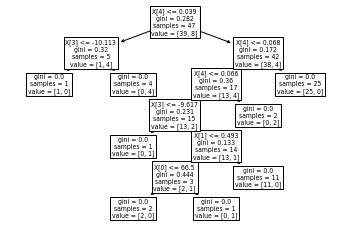

In [104]:
# Top album predictions

# Splits the dataset into the parameters and the target
album_data = albumdb.copy().iloc[:,2:-1]
album_target = albumdb.copy().iloc[:,-1:]

# Splits the data and target datasets into training and testing, at 7:3 split. Uses random seed to pick and choose data
X_train, X_test, y_train, y_test = train_test_split(album_data, album_target, test_size=0.1, random_state=6)
print(X_test)

# Fits decision tree and linear SVC model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
tree.plot_tree(dt_clf.fit(X_train, y_train.values.ravel())) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(X_train, y_train.values.ravel())

rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train.values.ravel())

print(dt_clf.predict(np.c_[X_test]))
print(knn.predict(np.c_[X_test]))
print(linear_svc.predict(np.c_[X_test]))
print(rfc.predict(np.c_[X_test]))

print("Running the model against current year nominees")

dt_clf.fit(album_data, album_target.values.ravel())
knn.fit(album_data, album_target.values.ravel())
linear_svc.fit(album_data, album_target.values.ravel())
rfc.fit(album_data, album_target.values.ravel())

print(nominations_albumdb_2020)
album_data_2020 = nominations_albumdb_2020.iloc[:,2:]
print(dt_clf.predict(np.c_[album_data_2020]))
print(knn.predict(np.c_[album_data_2020]))
print(linear_svc.predict(np.c_[album_data_2020]))
print(rfc.predict(np.c_[album_data_2020]))

In [143]:
labels=np.array(['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence'])
stats=song_data.loc[:,labels].values.mean(axis=0)

array([ 7.32075472e+01,  6.20981132e-01,  5.96547170e-01, -6.48830189e+00,
        8.63415094e-02,  2.52856792e-01,  1.73328302e-01,  4.63283019e-01,
        1.20813208e+02])

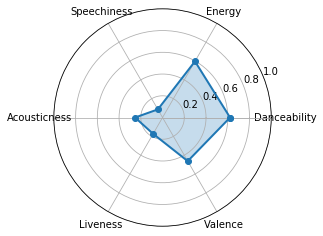

In [141]:
labels = album_data_2020.columns.values
stats = song_data.loc[:,labels[1:-1]].values.mean(axis=0)
labels=np.array(['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence'])
stats=song_data.loc[:,labels].values.mean(axis=0)


# Radar graph
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.ylim(0,1)
# ax.set_title([df.loc[386,"Name"]])
ax.grid(True)

array([ 6.20981132e-01,  5.96547170e-01, -6.48830189e+00,  8.63415094e-02,
        2.52856792e-01,  1.73328302e-01,  4.63283019e-01,  1.20813208e+02,
        6.20981132e-01])